In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv(r"C:\Users\Rohit\Downloads\covid19-global-forecasting-week-3\train.csv")
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,22-01-2020,0,0
1,2,NaN,Afghanistan,23-01-2020,0,0
2,3,NaN,Afghanistan,24-01-2020,0,0
3,4,NaN,Afghanistan,25-01-2020,0,0
4,5,NaN,Afghanistan,26-01-2020,0,0


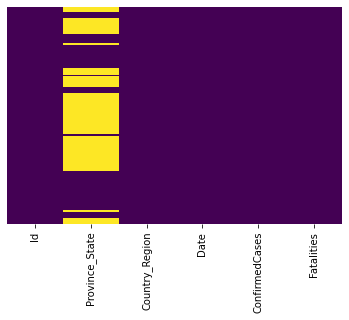

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
Id                23562 non-null int64
Province_State    10010 non-null object
Country_Region    23562 non-null object
Date              23562 non-null object
ConfirmedCases    23562 non-null int64
Fatalities        23562 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [12]:
total_countries_covid = train.groupby(['Country_Region'])['ConfirmedCases'].sum()

In [14]:
df = train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum() \
                       .groupby(['Country_Region','Province_State']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top15_countries = pd.DataFrame(df).head(15)
top15_countries

,ConfirmedCases
Country_Region,
US,396063
Spain,141942
Italy,135586
France,110064
Germany,107663
China,82719
Iran,62589
United Kingdom,55947
Turkey,34109


<Figure size 720x720 with 0 Axes>

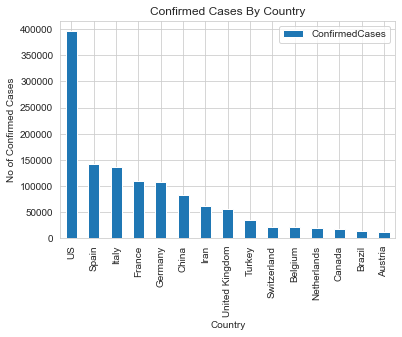

In [17]:

plt.figure(figsize = (10,10))

top15_countries.plot(kind = 'bar')
plt.xlabel('Country', fontsize=10)
plt.ylabel('No of Confirmed Cases', fontsize=10)
plt.title('Confirmed Cases By Country')
plt.show()

In [18]:
total_countries_covid.head()

Country_Region
Afghanistan     3454
Albania         4526
Algeria        13294
Andorra         6081
Angola           129
Name: ConfirmedCases, dtype: int64